In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install jupyter-black

In [4]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [5]:
df = pd.read_csv(
    "../../data/intermediate/data_concat.csv", header=0, parse_dates=["month"]
)

/tmp/ipykernel_4442/2452079848.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/intermediate/data_concat.csv", header =0, parse_dates=["month"])


In [6]:
df["year_of_sales"] = df["month"].dt.year
df["month_of_sales"] = df["month"].dt.month

In [7]:
# Desired column order
new_col_order = [
    "month",
    "year_of_sales",
    "month_of_sales",
    "town",
    "flat_type",
    "block",
    "street_name",
    "storey_range",
    "floor_area_sqm",
    "flat_model",
    "lease_commence_date",
    "resale_price",
    "remaining_lease",
    "year",
]

In [8]:
# Reorder the columns
df = df[new_col_order]

In [9]:
df.head()

,month,year_of_sales,month_of_sales,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,04 TO 06,63.0,STANDARD,1981,31400.0,NaN,1990
2,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,66500.0,NaN,1990
3,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,77000.0,NaN,1990
4,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,58000.0,NaN,1990


In [10]:
df["price_per_sqm"] = df.resale_price / df.floor_area_sqm

In [11]:
df.head()

,month,year_of_sales,month_of_sales,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,price_per_sqm
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,290.322581
1,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,04 TO 06,63.0,STANDARD,1981,31400.0,NaN,1990,498.412698
2,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,66500.0,NaN,1990,992.537313
3,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,77000.0,NaN,1990,747.572816
4,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,58000.0,NaN,1990,852.941176


In [12]:
new_col_order_2 = [
    "month",
    "year_of_sales",
    "month_of_sales",
    "town",
    "flat_type",
    "block",
    "street_name",
    "storey_range",
    "floor_area_sqm",
    "flat_model",
    "lease_commence_date",
    "price_per_sqm",
    "remaining_lease",
    "year",
    "resale_price",
]

In [13]:
# Reorder the columns
df = df[new_col_order_2]
df.head()

,month,year_of_sales,month_of_sales,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,price_per_sqm,remaining_lease,year,resale_price
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,290.322581,NaN,1990,9000.0
1,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,04 TO 06,63.0,STANDARD,1981,498.412698,NaN,1990,31400.0
2,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,992.537313,NaN,1990,66500.0
3,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,747.572816,NaN,1990,77000.0
4,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,852.941176,NaN,1990,58000.0


In [14]:
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [15]:
# Clean up the 'MULTI-GENERATION' entries
df["flat_type"] = df["flat_type"].str.replace("MULTI GENERATION", "MULTI-GENERATION")

In [16]:
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [21]:
town_region_mapping = {
    "TAMPINES": "East",
    "YISHUN": "North",
    "JURONG WEST": "West",
    "BEDOK": "East",
    "WOODLANDS": "North",
    "ANG MO KIO": "Central",
    "HOUGANG": "North-East",
    "BUKIT BATOK": "West",
    "CHOA CHU KANG": "West",
    "BUKIT MERAH": "Central",
    "SENGKANG": "North-East",
    "PASIR RIS": "East",
    "TOA PAYOH": "Central",
    "QUEENSTOWN": "Central",
    "GEYLANG": "Central",
    "CLEMENTI": "West",
    "BUKIT PANJANG": "West",
    "KALLANG/WHAMPOA": "Central",
    "JURONG EAST": "West",
    "SERANGOON": "North-East",
    "PUNGGOL": "North-East",
    "BISHAN": "Central",
    "SEMBAWANG": "North",
    "MARINE PARADE": "East",
    "CENTRAL AREA": "Central",
    "BUKIT TIMAH": "Central",
    "LIM CHU KANG": "West",
}

df["region"] = df["town"].map(town_region_mapping)

In [22]:
df.head()

,month,year_of_sales,month_of_sales,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,price_per_sqm,remaining_lease,year,resale_price,region
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,290.322581,NaN,1990,9000.0,Central
1,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,04 TO 06,63.0,STANDARD,1981,498.412698,NaN,1990,31400.0,Central
2,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,992.537313,NaN,1990,66500.0,Central
3,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,747.572816,NaN,1990,77000.0,Central
4,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,852.941176,NaN,1990,58000.0,Central


In [75]:
df.storey_range.unique()

array(['10 TO 12', '04 TO 06', '01 TO 03', '13 TO 15', '16 TO 18',
       '07 TO 09', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30',
       '31 TO 33', '37 TO 39', '40 TO 42', '34 TO 36', '01 TO 05',
       '06 TO 10', '11 TO 15', '16 TO 20', '26 TO 30', '36 TO 40',
       '21 TO 25', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [78]:
# low level = 1 to 9
# Mid level = 10 to 19
# High level = 20 & above

storey_mapping = {
    "10 TO 12": "mid_level(10 to 19)",
    "04 TO 06": "low_level(1 to 9)",
    "01 TO 03": "low_level(1 to 9)",
    "13 TO 15": "mid_level(10 to 19)",
    "16 TO 18": "mid_level(10 to 19)",
    "07 TO 09": "low_level(1 to 9)",
    "19 TO 21": "high_level(20 & above)",
    "22 TO 24": "high_level(20 & above)",
    "25 TO 27": "high_level(20 & above)",
    "28 TO 30": "high_level(20 & above)",
    "31 TO 33": "high_level(20 & above)",
    "37 TO 39": "high_level(20 & above)",
    "40 TO 42": "high_level(20 & above)",
    "34 TO 36": "high_level(20 & above)",
    "01 TO 05": "low_level(1 to 9)",
    "06 TO 10": "low_level(1 to 9)",
    "11 TO 15": "mid_level(10 to 19)",
    "16 TO 20": "mid_level(10 to 19)",
    "26 TO 30": "high_level(20 & above)",
    "36 TO 40": "high_level(20 & above)",
    "21 TO 25": "high_level(20 & above)",
    "31 TO 35": "high_level(20 & above)",
    "46 TO 48": "high_level(20 & above)",
    "43 TO 45": "high_level(20 & above)",
    "49 TO 51": "high_level(20 & above)",
}
df["level"] = df["storey_range"].map(storey_mapping)

In [79]:
df.head()

,month,year_of_sales,month_of_sales,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,price_per_sqm,remaining_lease,year,resale_price,region,level
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,290.322581,NaN,1990,9000.0,Central,mid_level(10 to 19)
1,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,04 TO 06,63.0,STANDARD,1981,498.412698,NaN,1990,31400.0,Central,low_level(1 to 9)
2,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,992.537313,NaN,1990,66500.0,Central,low_level(1 to 9)
3,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,747.572816,NaN,1990,77000.0,Central,low_level(1 to 9)
4,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,852.941176,NaN,1990,58000.0,Central,low_level(1 to 9)


# Price Per Square meter

In [74]:
def plot_sqm_1():
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    # hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(
        data=df,
        x="town",
        y="price_per_sqm",
        kind="bar",
        height=5,
        aspect=2.5,
        errorbar=None,
    )
    g.fig.suptitle("Price Per Square Meter across different town", y=1.01)
    g.set(xlabel="Town", ylabel="Price Per Square Meter")
    plt.xticks(rotation=90)
    # plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

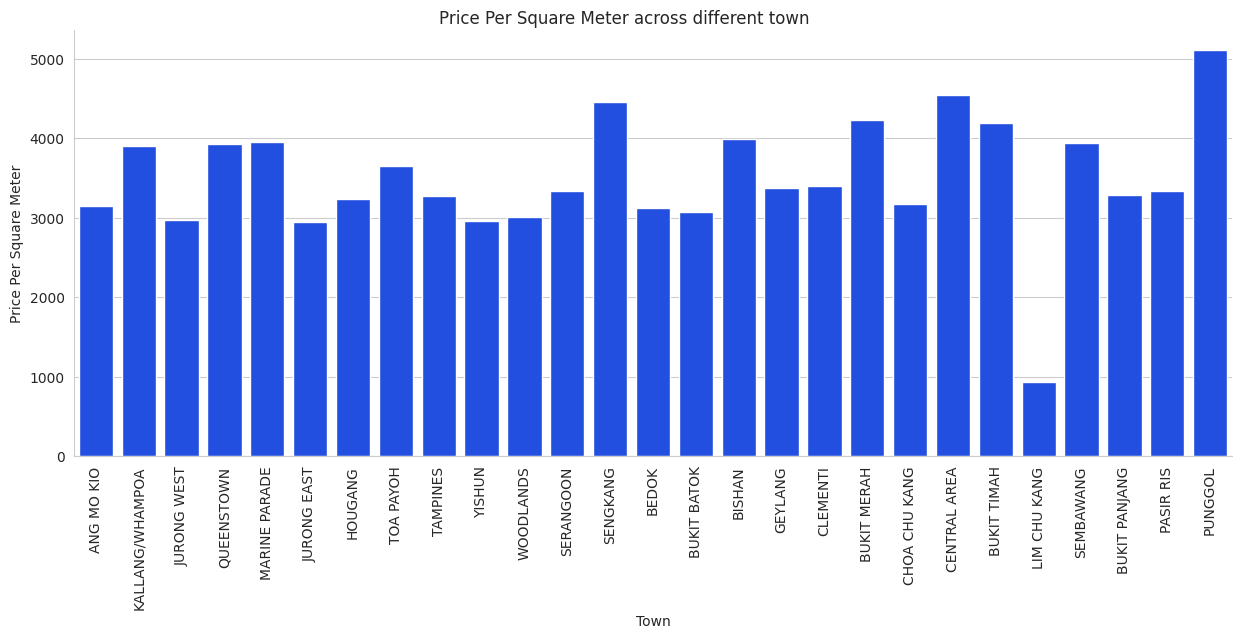

In [24]:
plt.clf()
plot_sqm_1()
plt.show()

In [25]:
def plot_sqm_2(room, twn):

    df_query = df.query("flat_type == @room & town == @twn")
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    # hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(
        data=df_query,
        x="town",
        y="price_per_sqm",
        kind="bar",
        height=5,
        aspect=2,
        errorbar=None,
        hue="year_of_sales",
        palette="bright",
    )
    g.fig.suptitle(f"Price Per Square Meter across {twn} and flat type: {room}", y=1.01)
    g.set(xlabel="Town", ylabel="Price Per Square Meter")
    plt.xticks(rotation=0)
    # plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

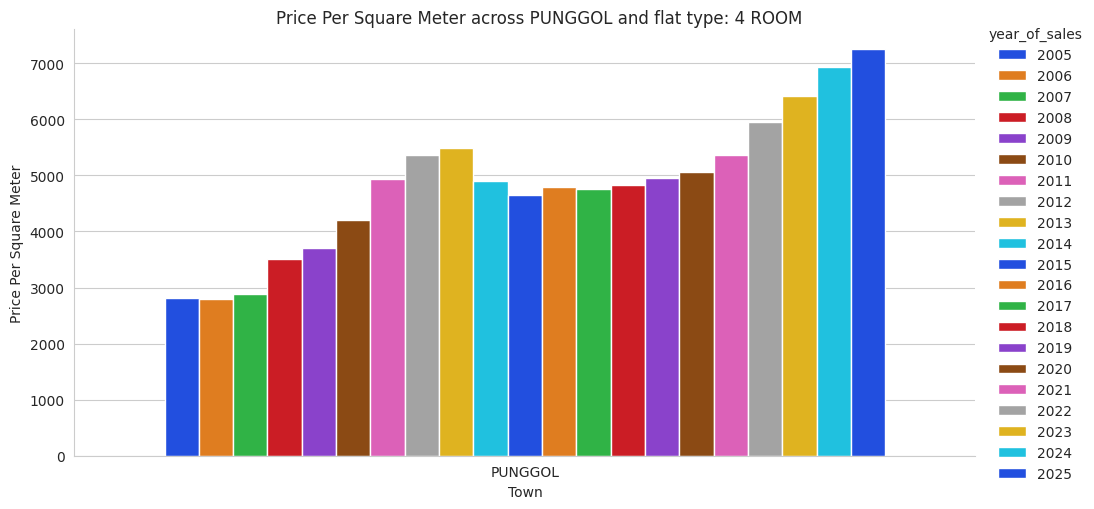

In [73]:
plt.clf()
plot_sqm_2("4 ROOM", "PUNGGOL")
plt.show()

In [27]:
def plot_sqm_4(room):

    df_query = df.query("flat_type == @room")
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    # hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(
        data=df_query,
        x="town",
        y="price_per_sqm",
        kind="box",
        height=5,
        aspect=2,
        errorbar=None,
        palette="bright",
    )
    g.fig.suptitle(
        f"Price Per Square Meter across different town and flat type: {room}", y=1.01
    )
    g.set(xlabel="Town", ylabel="Price Per Square Meter")
    plt.xticks(rotation=90)
    # plt.ticklabel_format(style='scientific', axis='y')

/tmp/ipykernel_4442/958756903.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_query, x="town", y="price_per_sqm", kind="box",


<Figure size 640x480 with 0 Axes>

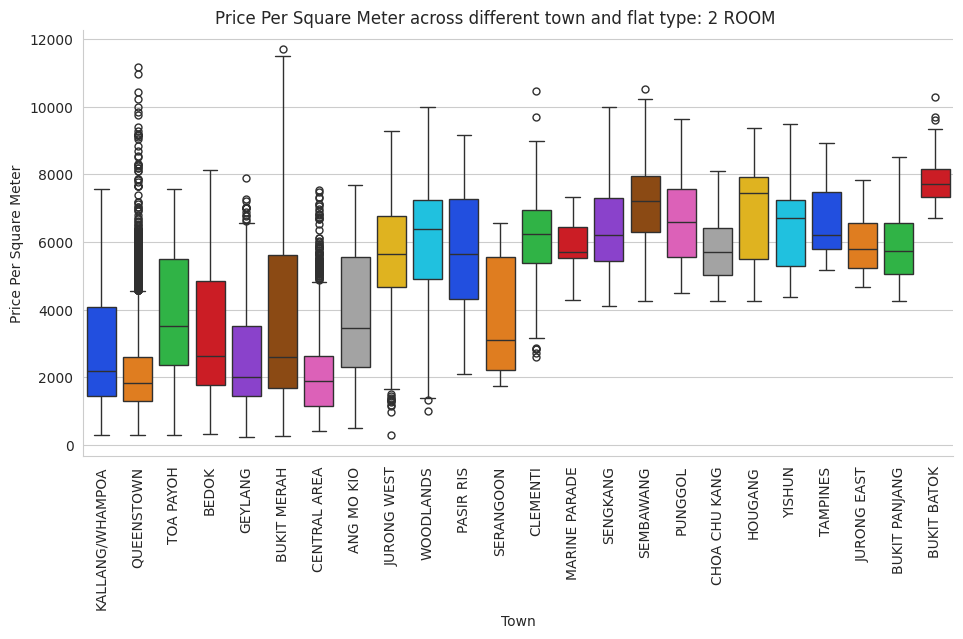

In [28]:
plt.clf()
plot_sqm_4("2 ROOM")
plt.show()

In [29]:
def plot_sqm_5(room):

    df_query = df.query("flat_type == @room")
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    # hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.relplot(
        data=df_query,
        x="year_of_sales",
        y="price_per_sqm",
        kind="line",
        height=3.5,
        aspect=2,
        palette="bright",
        errorbar=None,
        row="town",
    )

    g.fig.suptitle(
        f"Price Per Square Meter across different town and flat type: {room}", y=1.01
    )
    g.set(xlabel="Town", ylabel="Price Per Square Meter")
    plt.xticks(rotation=90)
    # plt.ticklabel_format(style='scientific', axis='y')

/tmp/ipykernel_4442/3091393681.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_query, x="year_of_sales", y="price_per_sqm", kind="line",


<Figure size 640x480 with 0 Axes>

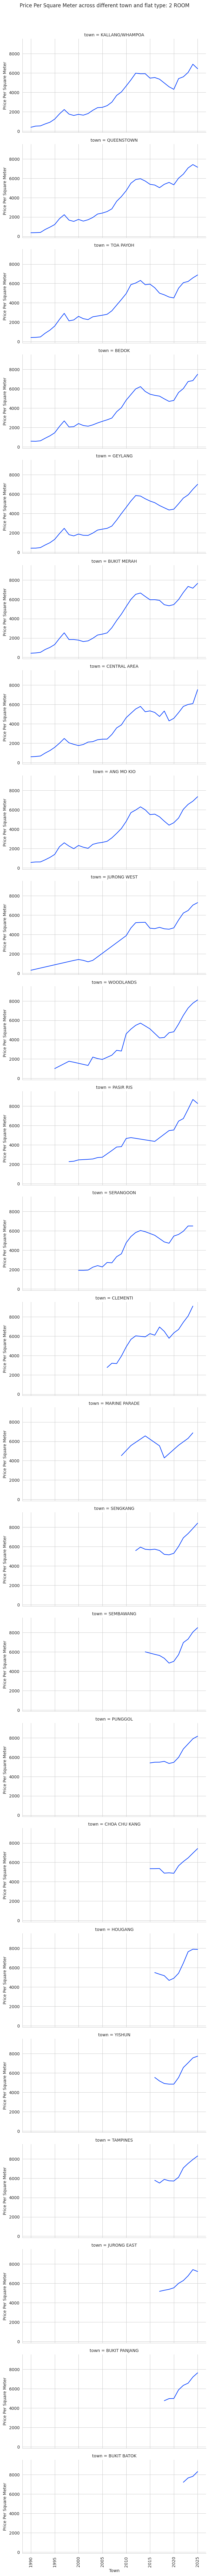

In [30]:
plt.clf()
plot_sqm_5("2 ROOM")
plt.show()

In [31]:
def plot_sqm_6(room):

    df_query = df.query("flat_type == @room")
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    # hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    # g = sns.relplot(data=df_query, x="year_of_sales", y="price_per_sqm", kind="line",
    # height=3.5, aspect=2, palette="bright", errorbar=None, row="town")
    g = sns.catplot(
        data=df_query,
        x="lease_commence_date",
        y="price_per_sqm",
        kind="bar",
        height=5,
        aspect=1.5,
        errorbar=None,
    )
    g.fig.suptitle(
        f"Price Per Square Meter across different town and flat type: {room}", y=1.01
    )
    g.set(xlabel="Town", ylabel="Price Per Square Meter")
    plt.xticks(rotation=90)
    # plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

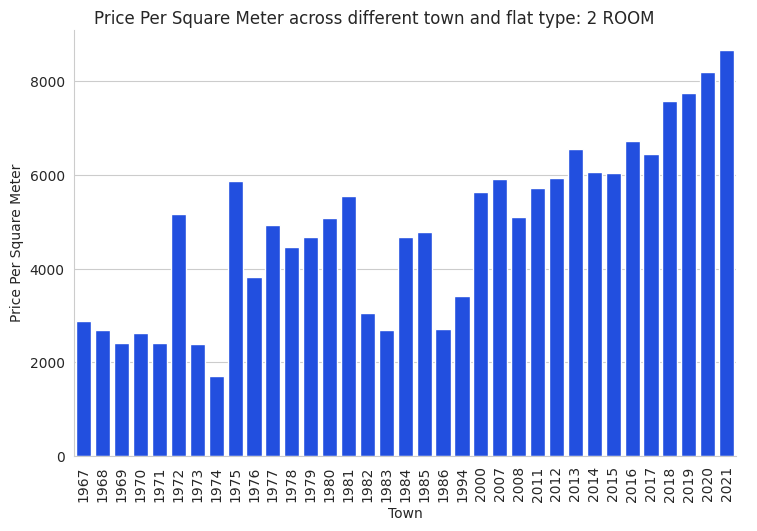

In [32]:
plt.clf()
plot_sqm_6("2 ROOM")
plt.show()

In [33]:
def plot_sqm_3(twn):

    df_query = df.query("town == @twn")
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    hue_order = [
        "1 ROOM",
        "2 ROOM",
        "3 ROOM",
        "4 ROOM",
        "5 ROOM",
        "EXECUTIVE",
        "MULTI-GENERATION",
    ]
    g = sns.catplot(
        data=df_query,
        x="town",
        y="price_per_sqm",
        kind="bar",
        height=5,
        aspect=1.5,
        errorbar=None,
        hue="flat_type",
        hue_order=hue_order,
        palette="bright",
    )
    g.fig.suptitle(f"Price Per Square Meter across {twn} and all flat type", y=1.01)
    g.set(xlabel="Town", ylabel="Price Per Square Meter")
    plt.xticks(rotation=0)
    plt.show()
    # plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

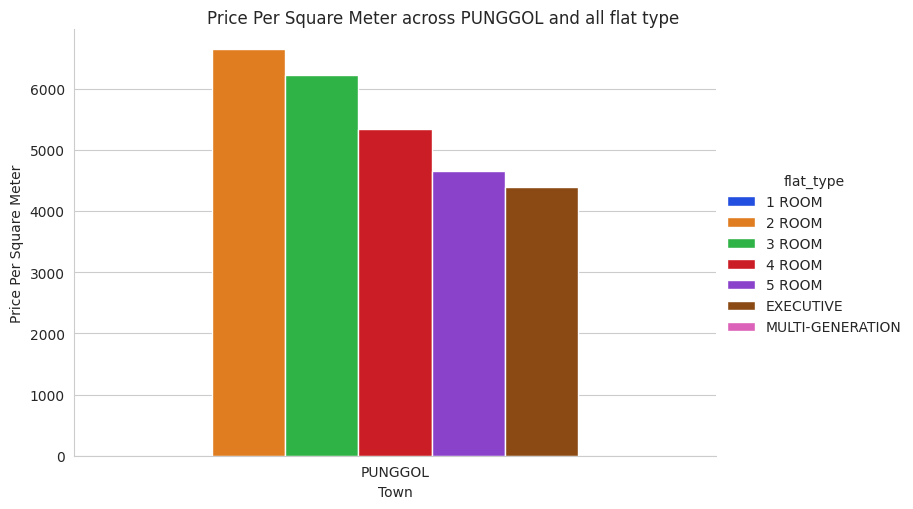

In [34]:
plt.clf()
plot_sqm_3("PUNGGOL")

## Resale price vs Town and flat type

In [35]:
def plot_box_1():
    plt.clf()
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    # row_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(
        data=df,
        x="town",
        y="resale_price",
        kind="bar",
        height=5,
        aspect=2.5,
        errorbar=None,
    )
    g.fig.suptitle("Mean Resale Price across different town", y=1.01)
    g.set(xlabel="Town", ylabel="Resale Price (mil)")
    # g.set(ylim=(0, 1_600_000))
    plt.xticks(rotation=90)
    plt.show()

<Figure size 640x480 with 0 Axes>

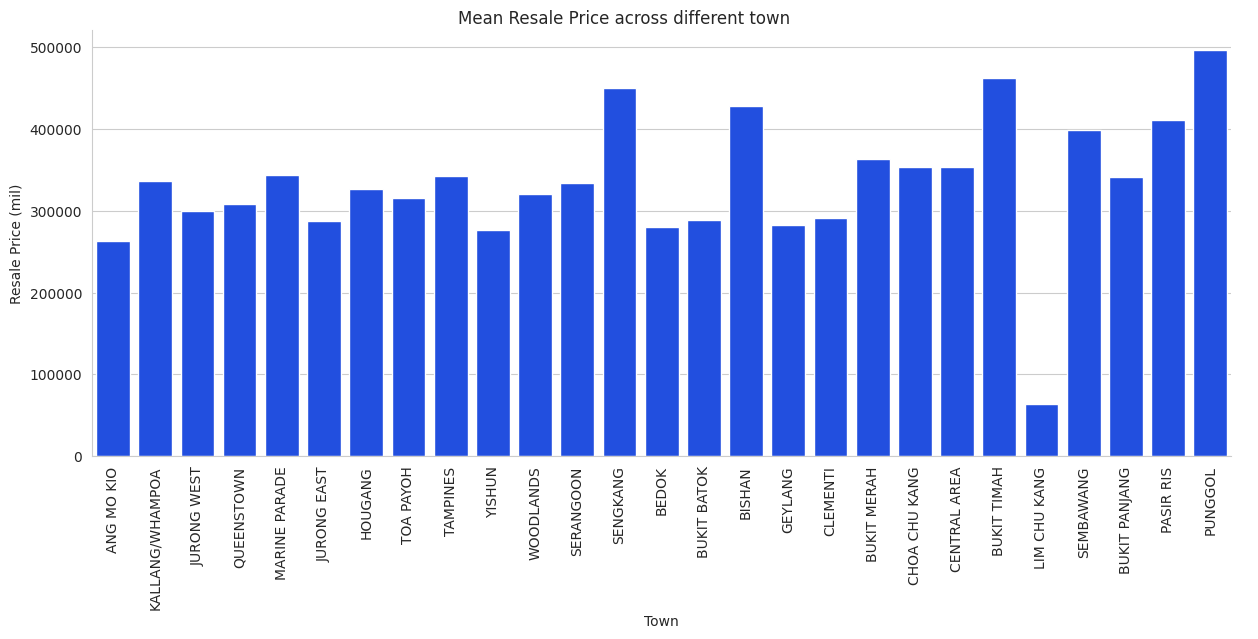

In [36]:
plt.clf()
plot_box_1()

In [37]:
def plot_box_2(twn):
    df_query = df.query("town == @twn")
    plt.clf()
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    hue_order = [
        "1 ROOM",
        "2 ROOM",
        "3 ROOM",
        "4 ROOM",
        "5 ROOM",
        "EXECUTIVE",
        "MULTI-GENERATION",
    ]
    g = sns.catplot(
        data=df_query,
        x="town",
        y="resale_price",
        kind="bar",
        height=5,
        aspect=2,
        errorbar=None,
        hue="flat_type",
        hue_order=hue_order,
        palette="bright",
    )
    g.fig.suptitle(f"Mean Resale Price across {twn} and different flat type", y=1.01)
    g.set(xlabel="Town", ylabel="Resale Price (mil)")
    # g.set(ylim=(0, 1_600_000))
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
plt.clf()
plot_box_2("PUNGGOL")

## Resale Price VS month

In [68]:
def plot_perMonth1():
    sns.set_style("ticks")
    sns.set_palette("bright")
    # hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(
        data=df,
        x="month_of_sales",
        y="resale_price",
        kind="bar",
        height=5,
        aspect=2,
        errorbar=None,
    )
    g.fig.suptitle(
        "Mean resale Price VS Mth of Sales across different town and flat type", y=1.01
    )
    g.set(xlabel="Month of Sales", ylabel="Resale Price")
    # g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel = "Resale Price (mil)")
    # plt.xticks(rotation=0)
    # plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

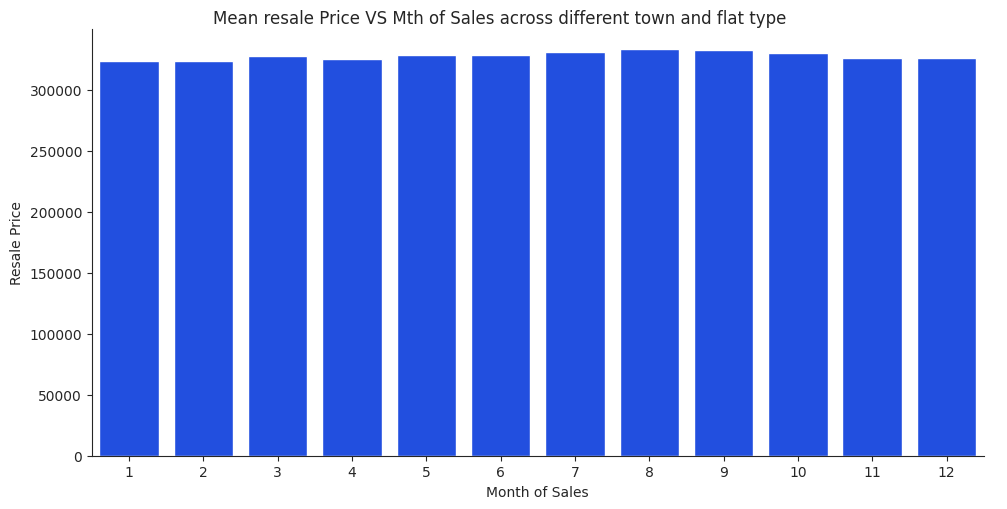

In [69]:
plt.clf()
plot_perMonth1()

In [71]:
def plot_perMonth2(room, twn):
    df_query = df.query("flat_type == @room & town == @twn")
    sns.set_style("ticks")
    sns.set_palette("bright")
    # hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(
        data=df,
        x="month_of_sales",
        y="resale_price",
        kind="bar",
        height=5,
        aspect=1,
        errorbar=None,
    )
    g.fig.suptitle(
        f"Resale Price VS Mth of Sales across {twn} and flat type: {room}", y=1.01
    )
    g.set(xlabel="Month of Sales", ylabel="Resale Price")
    # g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel = "Resale Price (mil)")
    # plt.xticks(rotation=0)
    # plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

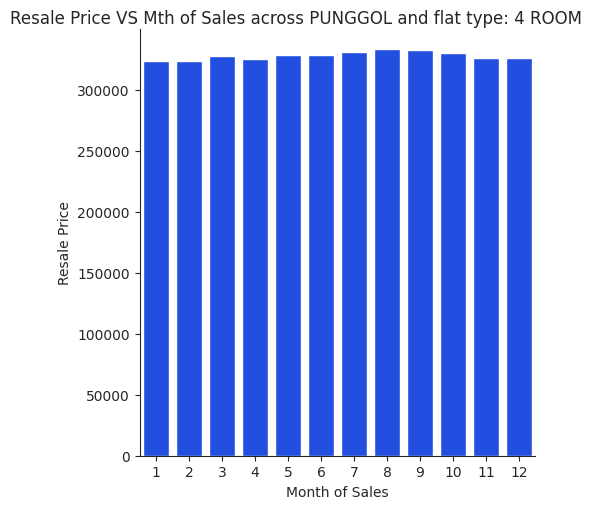

In [72]:
plt.clf()
plot_perMonth2("4 ROOM", "PUNGGOL")

## Resale price over the years

In [63]:
def plot_price_1():
    sns.set_style("ticks")
    sns.set_palette("bright")
    hue_order = [
        "1 ROOM",
        "2 ROOM",
        "3 ROOM",
        "4 ROOM",
        "5 ROOM",
        "EXECUTIVE",
        "MULTI-GENERATION",
    ]
    g = sns.relplot(
        data=df,
        x="month",
        y="resale_price",
        kind="line",
        height=5,
        aspect=2,
        palette="bright",
        errorbar=None,
        hue="flat_type",
        hue_order=hue_order,
    )
    g.fig.suptitle(f"Resale Price across all town", y=1.01)
    g.set(xlabel="Month of Sales", ylabel="Resale Price (mil)")
    # g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel="Resale Price (mil)")
    plt.show()

<Figure size 640x480 with 0 Axes>

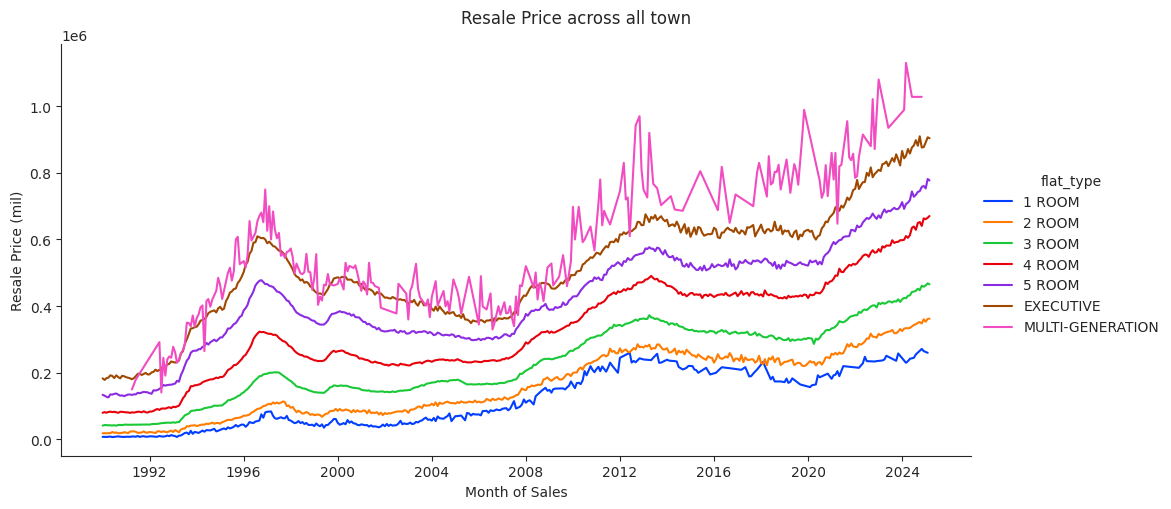

In [59]:
plt.clf()
plot_price_1()

In [66]:
def plot_price_2(room, twn):
    df_query = df.query("flat_type == @room & town == @twn")
    sns.set_style("ticks")
    sns.set_palette("bright")
    hue_order = [
        "1 ROOM",
        "2 ROOM",
        "3 ROOM",
        "4 ROOM",
        "5 ROOM",
        "EXECUTIVE",
        "MULTI-GENERATION",
    ]
    g = sns.relplot(
        data=df_query,
        x="month",
        y="resale_price",
        kind="line",
        height=5,
        aspect=2,
        palette="bright",
        errorbar=None,
    )
    g.fig.suptitle(f"Resale Price across {twn} and flat type: {room}", y=1.01)
    g.set(xlabel="Month of Sales", ylabel="Resale Price (mil)")
    # g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel="Resale Price (mil)")
    plt.show()

/tmp/ipykernel_4442/4225446435.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


<Figure size 640x480 with 0 Axes>

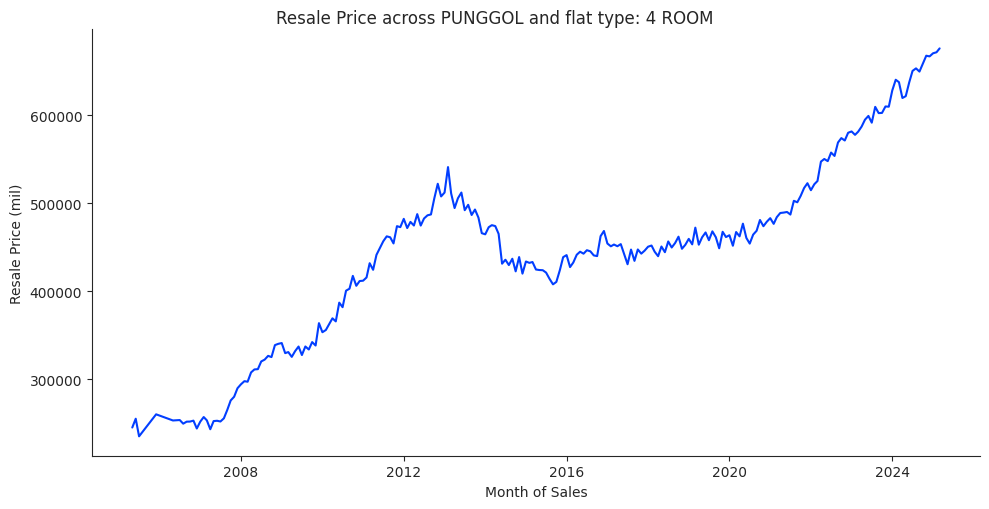

In [67]:
plt.clf()
plot_price_2("4 ROOM", "PUNGGOL")